In [0]:
import cifar10

In [2]:
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
images_train, cls_train, labels_train= cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


**Plotting Images**

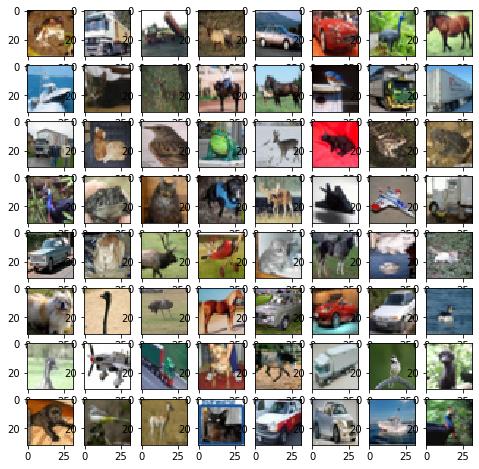

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
plt.show()

**Reshaping train test data**

In [6]:
x_train = images_train.reshape((50000,3072))
x_test = images_test.reshape((10000,3072))
y_train = cls_train
y_test = cls_test
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((50000, 3072), (10000, 3072), (50000,), (10000,))

**Applying PCA**

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_train)
pca.explained_variance_.shape

(3072,)

In [8]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.88:
  current_variance += pca.explained_variance_[k]
  k += 1
k

77

In [9]:
pca = PCA(n_components=k)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.transform(x_test)
x_train_transformed.shape, x_test_transformed.shape

((50000, 77), (10000, 77))

**Reconstructing Images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

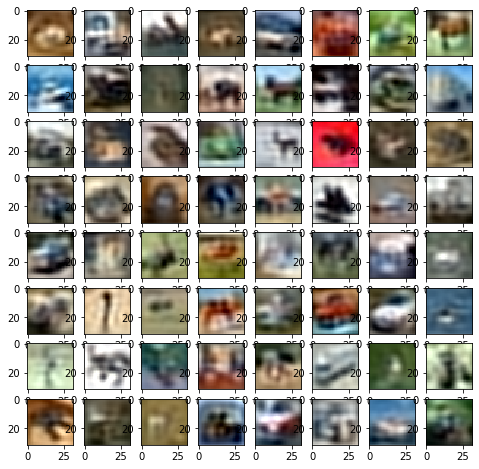

In [10]:
x_train_approx = pca.inverse_transform(x_train_transformed)
x_train_approx_reshaped = x_train_approx.reshape((50000,32,32,3))
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_train_approx_reshaped[i])
plt.show()

**Applying SVM for classification**

In [0]:
from sklearn import svm

In [12]:
clf = svm.SVC()
clf.fit(x_train_transformed,y_train)
y_pred = clf.predict(x_test_transformed)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5535
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1000
           1       0.65      0.66      0.65      1000
           2       0.46      0.42      0.44      1000
           3       0.37      0.41      0.39      1000
           4       0.49      0.45      0.47      1000
           5       0.51      0.47      0.49      1000
           6       0.55      0.62      0.58      1000
           7       0.64      0.57      0.60      1000
           8       0.65      0.68      0.67      1000
           9       0.59      0.62      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



**Visualization of Results**

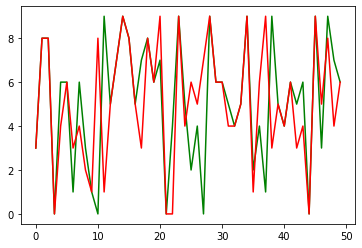

In [14]:
import numpy as np
x = np.arange(50)
plt.plot(x,y_test[0:50],'g',label = 'True Class')
plt.plot(x,y_pred[0:50],'r',label = 'Predicted Class')
plt.show()